# Machine learning

In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
%matplotlib inline

### Régression linéaire

In [2]:
from statsmodels.formula.api import ols

In [3]:
frame_pub=pd.read_csv("Advertising.csv",index_col=0)

In [4]:
frame_pub.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


(array([  2.,   9.,  20.,  47.,  35.,  29.,  22.,  17.,  12.,   7.]),
 array([  1.6 ,   4.14,   6.68,   9.22,  11.76,  14.3 ,  16.84,  19.38,
         21.92,  24.46,  27.  ]),
 <a list of 10 Patch objects>)

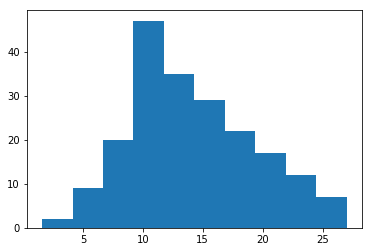

In [5]:
plt.hist(frame_pub["Sales"])

In [6]:
#on ajuste un modèle de régression linéaire
%time modele_reg1=ols("Sales ~ Radio+TV+Newspaper",data=frame_pub).fit()

Wall time: 35 ms


In [7]:
modele_reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Fri, 20 Oct 2017   Prob (F-statistic):           1.58e-96
Time:                        22:40:01   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
#on prédit avec le modèle
modele_reg1.predict(frame_pub[["Radio","TV","Newspaper"]])

1      20.523974
2      12.337855
3      12.307671
4      17.597830
5      13.188672
6      12.478348
7      11.729760
8      12.122953
9       3.727341
10     12.550849
11      7.032299
12     17.285129
13     10.577121
14      8.826300
15     18.434366
16     20.819300
17     12.823657
18     23.224957
19      9.951682
20     14.166073
21     18.100767
22     14.740538
23      6.489150
24     16.545933
25      8.146519
26     15.610039
27     14.989514
28     17.051673
29     19.410538
30      9.144024
         ...    
171     7.394980
172    14.358274
173     7.607692
174    11.970939
175    13.744357
176    24.786870
177    19.979373
178    12.162046
179    16.010997
180    12.384555
181    10.587200
182    13.928099
183     6.554670
184    24.133100
185    18.538521
186    20.803011
187     9.691373
188    17.076442
189    18.644306
190     6.051624
191    12.489159
192     8.424019
193     4.466230
194    18.486958
195    16.495300
196     5.370342
197     8.165312
198    12.7859

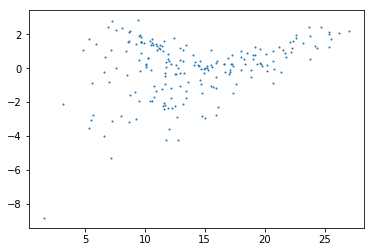

In [9]:
#on représente les résidus en fonction des valeurs de Sales
plt.scatter(frame_pub["Sales"],modele_reg1.resid,s=1)

### Régression linéaire avec scikit-learn

In [10]:
#on découpe notre base de données
from sklearn.model_selection import train_test_split

In [11]:
x_pub_train, x_pub_test, y_pub_train,y_pub_test =train_test_split(
    frame_pub[["Radio","TV","Newspaper"]],frame_pub["Sales"],test_size=0.2)

In [12]:
print(x_pub_test.shape,x_pub_train.shape,y_pub_test.shape,y_pub_train.shape)

(40, 3) (160, 3) (40,) (160,)


In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
#on construit un objet de la classe LinearRegression
modele_reg2=LinearRegression()

In [16]:
%time modele_reg2.fit(x_pub_train,y_pub_train)

Wall time: 0 ns


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
modele_reg2.coef_

array([ 0.18662015,  0.04660763,  0.0049458 ])

In [18]:
from sklearn.metrics import mean_squared_error

In [19]:
mean_squared_error(y_pub_test,modele_reg2.predict(x_pub_test))

3.5869256542629309

In [20]:
#on peut créer une sortie en utilisant pandas
DataFrame(modele_reg2.coef_,index=frame_pub.columns[0:3],columns=["Coefficients"])

,Coefficients
TV,0.186620
Radio,0.046608
Newspaper,0.004946


# L'utilisation des plus proches voisins

In [22]:
from sklearn.neighbors import KNeighborsRegressor

In [23]:
#on récupère des données nba 
frame_nba=pd.read_csv("nba_2013.csv")

In [24]:
#extraire Tony Parker
frame_nba[frame_nba["player"]=="Tony Parker"]

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
344,Tony Parker,PG,31,SAS,68,68,1997,456,914,0.499,...,138,155,388,36,9,151,86,1134,2013-2014,2013


In [25]:
frame_nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 31 columns):
player          481 non-null object
pos             481 non-null object
age             481 non-null int64
bref_team_id    481 non-null object
g               481 non-null int64
gs              481 non-null int64
mp              481 non-null int64
fg              481 non-null int64
fga             481 non-null int64
fg.             479 non-null float64
x3p             481 non-null int64
x3pa            481 non-null int64
x3p.            414 non-null float64
x2p             481 non-null int64
x2pa            481 non-null int64
x2p.            478 non-null float64
efg.            479 non-null float64
ft              481 non-null int64
fta             481 non-null int64
ft.             461 non-null float64
orb             481 non-null int64
drb             481 non-null int64
trb             481 non-null int64
ast             481 non-null int64
stl             481 non-null int64
blk    

In [26]:
#on se débarasse des données manquantes
frame_nba=frame_nba.dropna()

In [27]:
#on élimine les colonnes qualitatives
for col in frame_nba.columns:
    if frame_nba[col].dtype==object:
        frame_nba.drop(col,axis=1,inplace=True)


In [28]:
#on découpe le dataframe en x_train ...
x_nba_train, x_nba_test, y_nba_train,y_nba_test =train_test_split(
    frame_nba.drop("pts",axis=1),frame_nba["pts"],test_size=0.2)


In [29]:
#modele kNN
modele_knn5=KNeighborsRegressor(n_neighbors=5)
modele_knn10=KNeighborsRegressor(n_neighbors=10)
modele_knn2=KNeighborsRegressor(n_neighbors=2)


In [30]:
modele_knn2.fit(x_nba_train,y_nba_train)
modele_knn5.fit(x_nba_train,y_nba_train)
modele_knn10.fit(x_nba_train,y_nba_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=10, p=2,
          weights='uniform')

In [31]:
print("MSE pour 2 voisins :", mean_squared_error(y_nba_test,
                                                 modele_knn2.predict(x_nba_test)))
print("MSE pour 5 voisins :",mean_squared_error(y_nba_test,
                                                modele_knn5.predict(x_nba_test)))
print("MSE pour 10 voisins :",mean_squared_error(y_nba_test,
                                                 modele_knn10.predict(x_nba_test)))

MSE pour 2 voisins : 10654.8333333
MSE pour 5 voisins : 4532.21777778
MSE pour 10 voisins : 4578.35703704


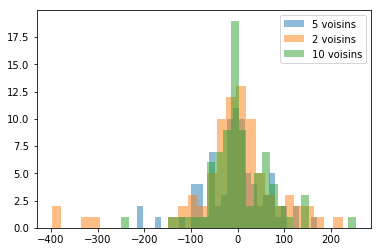

In [32]:
plt.hist(y_nba_test-modele_knn5.predict(x_nba_test),bins=30,alpha=0.5,label="5 voisins")
plt.hist(y_nba_test-modele_knn2.predict(x_nba_test),bins=30,alpha=0.5,label="2 voisins")
plt.hist(y_nba_test-modele_knn10.predict(x_nba_test),bins=30,alpha=0.5,label="10 voisins")
plt.legend()

### Les k-means

In [33]:
from sklearn.datasets import make_blobs

In [34]:
x_blob, y_blob=make_blobs(n_samples=10000,n_features=6,centers=4,cluster_std=2)

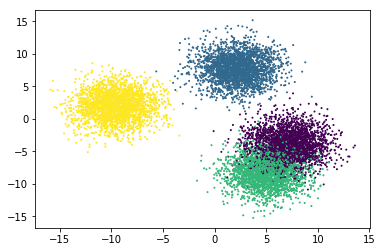

In [35]:
plt.scatter(x_blob[:,3],x_blob[:,2],s=1,c=y_blob)
plt.rcParams['figure.figsize'] = (6, 10)

In [36]:
from sklearn.cluster import KMeans

In [37]:
modele_km=KMeans(n_clusters=4)

In [38]:
modele_km.fit(x_blob)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

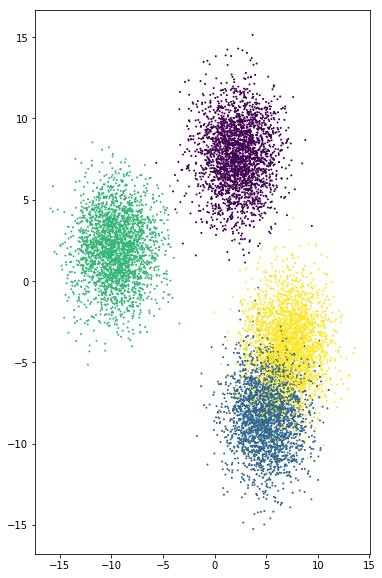

In [39]:
plt.scatter(x_blob[:,3],x_blob[:,2],s=1,c=modele_km.predict(x_blob))

In [40]:
pd.crosstab(y_blob,modele_km.predict(x_blob))

col_0,0,1,2,3
row_0,,,,
0,0,0,0,2500
1,2500,0,0,0
2,0,2500,0,0
3,0,0,2500,0


#### Traitement d'une image avec les k-means

In [41]:
from scipy import misc

In [43]:
image=misc.imread("New York.jpg")

In [45]:
image.shape

(3264, 4896, 3)

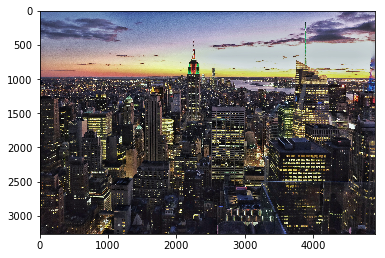

In [46]:
plt.imshow(image)

In [47]:
n_colors=3
face=(image/255.0).reshape(-1,3)
#face=(image/255.0).reshape(image.shape[0]*image.shape[1],3)
face.shape

(15980544, 3)

In [48]:
modele_ny=KMeans(n_colors)

In [49]:
modele_ny.fit(face)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [50]:
modele_ny.cluster_centers_

array([[ 0.75768755,  0.74668989,  0.70932004],
       [ 0.14496903,  0.13360358,  0.14719931],
       [ 0.4436717 ,  0.41832085,  0.46159787]])

In [153]:
modele_ny.labels_.shape

(15980544,)

In [51]:
new_image=modele_ny.cluster_centers_[modele_ny.labels_]
new_image.shape

(15980544, 3)

In [52]:
modele_ny.cluster_centers_

array([[ 0.75768755,  0.74668989,  0.70932004],
       [ 0.14496903,  0.13360358,  0.14719931],
       [ 0.4436717 ,  0.41832085,  0.46159787]])

In [53]:
new_image=(new_image*255.0).reshape(image.shape)

In [54]:
new_image

array([[[ 113.13628269,  106.67181724,  117.70745761],
        [ 113.13628269,  106.67181724,  117.70745761],
        [ 113.13628269,  106.67181724,  117.70745761],
        ..., 
        [ 113.13628269,  106.67181724,  117.70745761],
        [ 113.13628269,  106.67181724,  117.70745761],
        [ 113.13628269,  106.67181724,  117.70745761]],

       [[ 113.13628269,  106.67181724,  117.70745761],
        [ 113.13628269,  106.67181724,  117.70745761],
        [ 113.13628269,  106.67181724,  117.70745761],
        ..., 
        [ 113.13628269,  106.67181724,  117.70745761],
        [ 113.13628269,  106.67181724,  117.70745761],
        [ 113.13628269,  106.67181724,  117.70745761]],

       [[ 113.13628269,  106.67181724,  117.70745761],
        [ 113.13628269,  106.67181724,  117.70745761],
        [ 113.13628269,  106.67181724,  117.70745761],
        ..., 
        [ 113.13628269,  106.67181724,  117.70745761],
        [ 113.13628269,  106.67181724,  117.70745761],
        [ 113.13628

In [55]:
new_image=new_image.astype("uint8")

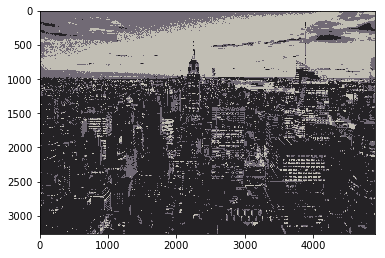

In [56]:
plt.imshow(new_image)

# Churn telecom

In [57]:
# on récupère les données
frame_telco=pd.read_csv("telecom.csv")

In [58]:
#on recode y
y=np.where(frame_telco["Churn?"]=="True.",1,0)

In [59]:
# on garde uniquement les données quantitatives
x=frame_telco.select_dtypes(include= [np.number])

In [60]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [61]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [62]:
#on crée plusieurs modèles
modele_rf=RandomForestClassifier()
modele_gbm=GradientBoostingClassifier()
modele_svm=SVC()
modele_lr=LogisticRegression()

In [63]:
modele_rf.fit(x_train,y_train)
modele_gbm.fit(x_train,y_train)
modele_svm.fit(x_train,y_train)
modele_lr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [64]:
#on peut visualiser l'importance des variables
DataFrame(modele_rf.feature_importances_,index=x.columns,columns=["Importance"])

,Importance
Account Length,0.046386
Area Code,0.015020
VMail Message,0.047922
Day Mins,0.129248
Day Calls,0.034986
Day Charge,0.179502
Eve Mins,0.069283
Eve Calls,0.037136
Eve Charge,0.081586
Night Mins,0.042192


In [65]:
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score

In [66]:
auc_rf=roc_auc_score(y_test,modele_rf.predict(x_test))
auc_gbm=roc_auc_score(y_test,modele_gbm.predict(x_test))
auc_svm=roc_auc_score(y_test,modele_svm.predict(x_test))
auc_lr=roc_auc_score(y_test,modele_lr.predict(x_test))

In [67]:
print("RF", auc_rf)
print("GBM", auc_gbm)
print("SVM", auc_svm)
print("LR", auc_lr)

RF 0.75496675868
GBM 0.75279926908
SVM 0.5
LR 0.533270479375


In [68]:
accuracy_score(y_test,modele_svm.predict(x_test))

0.86656671664167917

In [69]:
accuracy_score(y_test,modele_rf.predict(x_test))

0.92953523238380809

In [70]:
confusion_matrix(y_test,modele_rf.predict(x_test))

array([[574,   4],
       [ 43,  46]])

### Grid search

In [71]:
#on définit la grille
dico_param={"n_estimators":[10,100,1000],"max_depth":[3,7,12]}

In [72]:
from sklearn.model_selection import GridSearchCV

In [73]:
modele_gridrf=GridSearchCV(modele_rf,dico_param,scoring="roc_auc",cv=5)

In [74]:
modele_gridrf.fit(x_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 100, 1000], 'max_depth': [3, 7, 12]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [75]:
modele_gridrf.grid_scores_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.84861, std: 0.02733, params: {'max_depth': 3, 'n_estimators': 10},
 mean: 0.86177, std: 0.01366, params: {'max_depth': 3, 'n_estimators': 100},
 mean: 0.86439, std: 0.01266, params: {'max_depth': 3, 'n_estimators': 1000},
 mean: 0.87339, std: 0.02223, params: {'max_depth': 7, 'n_estimators': 10},
 mean: 0.88335, std: 0.01244, params: {'max_depth': 7, 'n_estimators': 100},
 mean: 0.88043, std: 0.01213, params: {'max_depth': 7, 'n_estimators': 1000},
 mean: 0.85255, std: 0.01946, params: {'max_depth': 12, 'n_estimators': 10},
 mean: 0.87326, std: 0.01947, params: {'max_depth': 12, 'n_estimators': 100},
 mean: 0.87467, std: 0.01879, params: {'max_depth': 12, 'n_estimators': 1000}]